# Importing required Packages:

In [1]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the data:

In [2]:
train_data = pd.read_csv("train2.csv")
test_data = pd.read_csv("test2.csv")

final = pd.read_csv("sample_submission.csv")

In [3]:
test = test_data.drop('Id',axis=1)
train = train_data.drop('Id',axis=1)

print("shape of train data:",train.shape)
print("shape of test data:",test.shape)

shape of train data: (1460, 80)
shape of test data: (1459, 79)


# Exploring the dataset

In [4]:
train.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [5]:
test.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


In [6]:
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
test.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

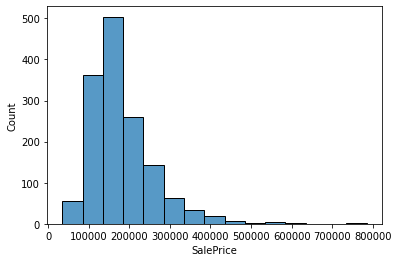

In [8]:
sns.histplot(x="SalePrice", data=train,binwidth=50000)

In [9]:
print("Missing values in train data set:\n")
for col in train.columns:
    #Checking if there are missing values in the column
    a=train[col].isnull().sum()
    if a>0:
        print(col , "-" , a , "---------", int(round((a/train.shape[0])*100)), "%" )
        

Missing values in train data set:

LotFrontage - 259 --------- 18 %
Alley - 1369 --------- 94 %
MasVnrType - 8 --------- 1 %
MasVnrArea - 8 --------- 1 %
BsmtQual - 37 --------- 3 %
BsmtCond - 37 --------- 3 %
BsmtExposure - 38 --------- 3 %
BsmtFinType1 - 37 --------- 3 %
BsmtFinType2 - 38 --------- 3 %
Electrical - 1 --------- 0 %
FireplaceQu - 690 --------- 47 %
GarageType - 81 --------- 6 %
GarageYrBlt - 81 --------- 6 %
GarageFinish - 81 --------- 6 %
GarageQual - 81 --------- 6 %
GarageCond - 81 --------- 6 %
PoolQC - 1453 --------- 100 %
Fence - 1179 --------- 81 %
MiscFeature - 1406 --------- 96 %


In [10]:
print("Missing values in test data set:\n")
for col in test.columns:
    #Checking if there are missing values in the column
    a=test[col].isnull().sum()
    if a>0:
        print(col , "-" , a , "---------", int(round((a/test.shape[0])*100)), "%" )
        

Missing values in test data set:

MSZoning - 4 --------- 0 %
LotFrontage - 227 --------- 16 %
Alley - 1352 --------- 93 %
Utilities - 2 --------- 0 %
Exterior1st - 1 --------- 0 %
Exterior2nd - 1 --------- 0 %
MasVnrType - 16 --------- 1 %
MasVnrArea - 15 --------- 1 %
BsmtQual - 44 --------- 3 %
BsmtCond - 45 --------- 3 %
BsmtExposure - 44 --------- 3 %
BsmtFinType1 - 42 --------- 3 %
BsmtFinSF1 - 1 --------- 0 %
BsmtFinType2 - 42 --------- 3 %
BsmtFinSF2 - 1 --------- 0 %
BsmtUnfSF - 1 --------- 0 %
TotalBsmtSF - 1 --------- 0 %
BsmtFullBath - 2 --------- 0 %
BsmtHalfBath - 2 --------- 0 %
KitchenQual - 1 --------- 0 %
Functional - 2 --------- 0 %
FireplaceQu - 730 --------- 50 %
GarageType - 76 --------- 5 %
GarageYrBlt - 78 --------- 5 %
GarageFinish - 78 --------- 5 %
GarageCars - 1 --------- 0 %
GarageArea - 1 --------- 0 %
GarageQual - 78 --------- 5 %
GarageCond - 78 --------- 5 %
PoolQC - 1456 --------- 100 %
Fence - 1169 --------- 80 %
MiscFeature - 1408 --------- 97 %
SaleT

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [13]:
cat_col = []
num_col = []
for col in train.columns:
    if(train[col].dtype==object):
        cat_col.append(col)
    else:
        num_col.append(col)
        
num_col.remove('SalePrice')


# Filling NaN values

In [14]:
train['Electrical'].fillna(train['Electrical'].mode(), inplace=True)

for col in cat_col:
    if(any(train[col].isnull())):
        train[col].fillna('No',inplace=True)
    
for col in num_col:
    if(any(train[col].isnull())):
        train[col].fillna(0,inplace=True)
        
for col in cat_col:
    if(any(test[col].isnull())):
        test[col].fillna("NO",inplace=True)
    
for col in num_col:
    if(any(test[col].isnull())):
        test[col].fillna(0,inplace=True)


# Categorical variables encoding 'Ordinal Encoder'

In [15]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

train[cat_col] = ordinal_encoder.fit_transform(train[cat_col])
test[cat_col] = ordinal_encoder.fit_transform(test[cat_col])

In [16]:
train.sample(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
891,60,3.0,70.0,11184,1.0,1.0,3.0,3.0,0.0,4.0,...,0,3.0,4.0,1.0,0,7,2009,8.0,4.0,172500
360,85,3.0,0.0,7540,1.0,1.0,0.0,3.0,0.0,1.0,...,0,3.0,2.0,1.0,0,6,2007,8.0,4.0,156000
689,120,3.0,61.0,7577,1.0,1.0,0.0,3.0,0.0,0.0,...,0,3.0,4.0,1.0,0,6,2007,8.0,4.0,194700
1275,90,3.0,95.0,11345,1.0,1.0,3.0,3.0,0.0,0.0,...,0,3.0,4.0,1.0,0,7,2007,8.0,4.0,137000
1100,30,3.0,60.0,8400,1.0,1.0,3.0,0.0,0.0,4.0,...,0,3.0,4.0,1.0,0,1,2009,8.0,4.0,60000


In [17]:
test.sample(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
100,90,4.0,72.0,10773,1.0,1.0,3.0,3.0,0.0,4.0,...,0,0,2.0,4.0,1.0,0,5,2010,9.0,4.0
1354,30,4.0,0.0,17529,1.0,1.0,3.0,3.0,0.0,4.0,...,0,0,2.0,4.0,1.0,0,4,2006,9.0,4.0
437,70,4.0,43.0,5707,1.0,1.0,3.0,0.0,0.0,4.0,...,0,0,2.0,4.0,1.0,0,3,2009,9.0,4.0
1355,20,4.0,0.0,20355,1.0,1.0,3.0,2.0,0.0,4.0,...,0,0,2.0,4.0,1.0,0,6,2006,9.0,4.0
181,60,1.0,70.0,7000,1.0,1.0,3.0,3.0,0.0,4.0,...,0,0,2.0,4.0,1.0,0,6,2009,9.0,4.0


In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   float64
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   float64
 5   Alley          1460 non-null   float64
 6   LotShape       1460 non-null   float64
 7   LandContour    1460 non-null   float64
 8   Utilities      1460 non-null   float64
 9   LotConfig      1460 non-null   float64
 10  LandSlope      1460 non-null   float64
 11  Neighborhood   1460 non-null   float64
 12  Condition1     1460 non-null   float64
 13  Condition2     1460 non-null   float64
 14  BldgType       1460 non-null   float64
 15  HouseStyle     1460 non-null   float64
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [19]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   float64
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   float64
 5   Alley          1459 non-null   float64
 6   LotShape       1459 non-null   float64
 7   LandContour    1459 non-null   float64
 8   Utilities      1459 non-null   float64
 9   LotConfig      1459 non-null   float64
 10  LandSlope      1459 non-null   float64
 11  Neighborhood   1459 non-null   float64
 12  Condition1     1459 non-null   float64
 13  Condition2     1459 non-null   float64
 14  BldgType       1459 non-null   float64
 15  HouseStyle     1459 non-null   float64
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

# Looking for correlation:

In [20]:
corr_matrix = train.corr()
corr_matrix['SalePrice'].sort_values(ascending=False)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
                  ...   
GarageType     -0.415283
GarageFinish   -0.425684
KitchenQual    -0.589189
BsmtQual       -0.593734
ExterQual      -0.636884
Name: SalePrice, Length: 80, dtype: float64

In [21]:
def correlation(df,threshold):
    cor_col = []
    for i in range( len(corr_matrix.columns) ):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                print(corr_matrix.columns[i] , corr_matrix.columns[j] )
                cor_col.append(corr_matrix.columns[i])
               
    return cor_col

# Train-Test split from training data:

In [22]:
from sklearn.model_selection import train_test_split

X = train.drop('SalePrice', axis=1)
y = train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)


In [23]:
cor_col = correlation(X_train,0.85)
cor_col

Exterior2nd Exterior1st
GarageArea GarageCars
PoolQC PoolArea


['Exterior2nd', 'GarageArea', 'PoolQC']

# Dropping highly correlated columns:

In [24]:
X_train.drop(cor_col,axis=1)
X_test.drop(cor_col,axis=1)
test.drop(cor_col,axis=1)

print("shape of train data:",X_train.shape)
print("shape of test data:",X_test.shape)
print("shape of final test data:",test.shape)

shape of train data: (1022, 79)
shape of test data: (438, 79)
shape of final test data: (1459, 79)


# Implementing RandomForestRegressor:

In [25]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor()

regr.fit(X_train,y_train)

RandomForestRegressor()

In [26]:
y_pred = regr.predict(X_test)


from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

17494.811438356166

In [27]:
ans = regr.predict(test)

In [28]:
output = pd.DataFrame({'Id': test_data.Id, 'SalePrice': ans})
output.to_csv('houseRF3.csv', index=False)

In [31]:
mean_absolute_error(final['SalePrice'], ans)

53085.46600410411

In [32]:
print("Submited successfully.")

Submited successfully.
